In [1]:
from functions.Pre_Processing_Casos_Leves import *
from functions.analises import *
import matplotlib.pyplot as plt

import seaborn as sns

from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

import pmdarima as pm

import matplotlib as mpl

from sklearn.model_selection import cross_val_score, train_test_split
import statsmodels.api as sm
import statsmodels.tsa.api as tsa

import pandas as pd

In [2]:
# casos_leves = Pre_Processing_Casos_Leves()
# casos_leves.run(columns_symptoms, columns_to_drop, path)

In [3]:
df = pd.read_csv(r'C:\Users\gabri\Desktop\Git - Tcc\df_casos_leves')
df

C:\Users\gabri\AppData\Local\Temp\ipykernel_13396\3450452656.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\gabri\Desktop\Git - Tcc\df_casos_leves')


,Unnamed: 0,sexo,data_notificacao,idade,data_inicio_sintomas,sintomas,outros_sintomas,classificacao_final,resultado_final,bairro,...,SYMPTOM_BODY_PAIN,SYMPTOM_DIARRHEA,SYMPTOM_RUNNY_NOSE,SYMPTOM_NOSE_CONGESTION,SYMPTOM_WEAKNESS,SYMPTOM_ANOSMIA_OR_HYPOSMIA,SYMPTOM_NAUSEA,SYMPTOM_LACK_OF_APPETITE,SYMPTOM_ABDOMINAL_PAIN,SYMPTOM_CONSCIOUSNESS_DEGRADATION
0,0,1,2020-01-12,28,2020-01-12,['ASSINTOMÁTICO'],[],7,4,SANCHO,...,0,0,0,0,0,0,0,0,0,0
1,1,0,2020-01-20,36,2020-01-20,['ASSINTOMÁTICO'],[],7,2,ROSARINHO,...,0,0,0,0,0,0,0,0,0,0
2,2,0,2020-01-20,45,2020-01-20,['ASSINTOMÁTICO'],[],7,2,CASA AMARELA,...,0,0,0,0,0,0,0,0,0,0
3,3,1,2020-01-20,58,2020-01-20,['ASSINTOMÁTICO'],[],7,2,ROSARINHO,...,0,0,0,0,0,0,0,0,0,0
4,4,0,2020-01-22,33,2020-01-22,['ASSINTOMÁTICO'],[],7,2,IPUTINGA,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889840,889840,0,2022-01-23,27,2022-01-23,['OUTROS'],['PRÉ-CIRÚRGICO'],7,4,CAMPO GRANDE,...,0,0,0,0,0,0,0,0,0,0
889841,889841,1,2022-01-23,26,2022-01-23,['OUTROS'],['PRÉ-CIR´ÚRGICO'],7,4,IBURA,...,0,0,0,0,0,0,0,0,0,0
889842,889842,0,2022-01-23,38,2022-01-23,['ASSINTOMÁTICO'],['0'],7,4,COHAB,...,0,0,0,0,0,0,0,0,0,0
889843,889843,0,2022-01-23,26,2022-01-16,"['CORIZA', 'DOR DE CABEÇA', 'DOR DE GARGANTA',...",['0'],7,4,POCO,...,0,0,1,0,0,0,0,0,0,0


In [4]:
# df.to_csv('df_casos_leves')

In [5]:
analises = analises()

In [6]:
analises.run_leves(df)
df2 = analises.df2
df2

,Sintoma,Count,percentage
0,SYMPTOM_COUGH,310080,34.846518
1,SYMPTOM_COLD,7574,0.851159
2,SYMPTOM_AIR_INSUFFICIENCY,75339,8.466531
3,SYMPTOM_FEVER,210043,23.604448
4,SYMPTOM_LOW_OXYGEN_SATURATION,29,0.003259
5,SYMPTOM_BREATHING_CONDITION,1797,0.201945
6,SYMPTOM_TORACIC_APERTURE,1463,0.164411
7,SYMPTOM_THROAT_CONDITION,242127,27.210020
8,SYMPTOM_HEADACHE,11931,1.340795
9,SYMPTOM_BODY_PAIN,49695,5.584680


Análises gráficas quantitativa dos sintomas


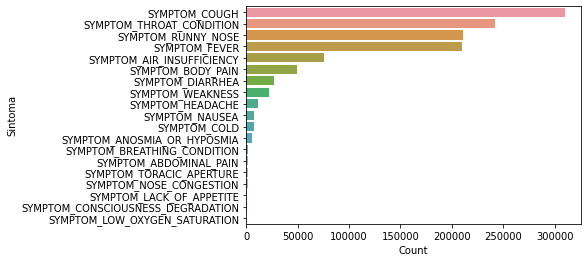

In [7]:
analises.plot_data_sintomas()

## Análise série temporal 

In [8]:
df['data_notificacao'].value_counts()

2022-01-31    8212
2022-02-04    8063
2022-02-03    7960
2022-02-02    7926
2022-02-01    7870
              ... 
2020-02-18       1
2020-01-25       1
2020-01-24       1
2020-01-22       1
2022-01-20       1
Name: data_notificacao, Length: 821, dtype: int64

In [9]:
df_st = df['data_notificacao'].value_counts().rename_axis('Data_notificacao').to_frame('N_casos')
df_st.sort_index(inplace = True)
df_st

,N_casos
Data_notificacao,
2020-01-12,1
2020-01-20,3
2020-01-22,1
2020-01-24,1
2020-01-25,1
...,...
2022-06-17,1327
2022-06-18,550
2022-06-19,552


In [19]:
df_st['N_casos'].mean()

1083.855054811206

In [18]:
df_st[df_st['N_casos'] > 4000 ]

,N_casos
Data_notificacao,
2022-01-24,5651
2022-01-25,5547
2022-01-26,6672
2022-01-27,7302
2022-01-28,7185
2022-01-29,4253
2022-01-30,4308
2022-01-31,8212
2022-02-01,7870


#### Planto a série

<AxesSubplot:xlabel='Data_notificacao'>

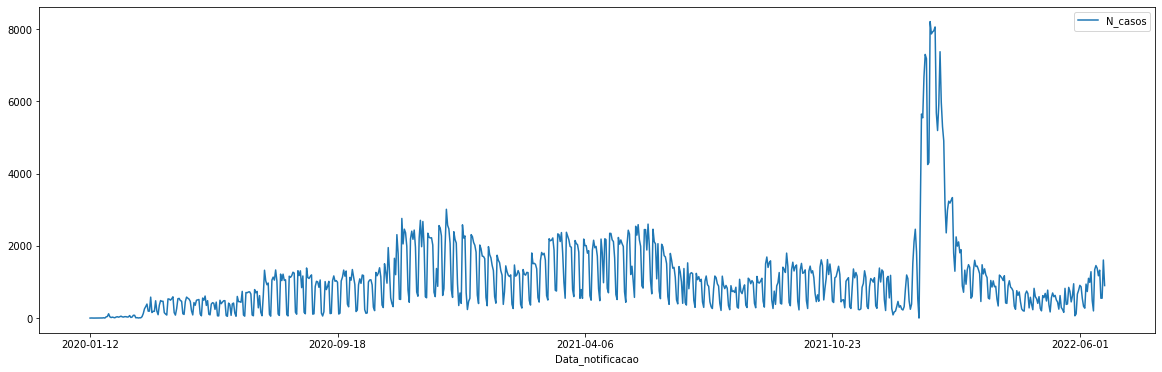

In [10]:
df_st.plot(figsize=(20,6))

O gráfico apresenta um pico bantante irregular no periodo de 24/01/22 a 11/02/22 com casos diários acima de 4000

<AxesSubplot:ylabel='Frequency'>

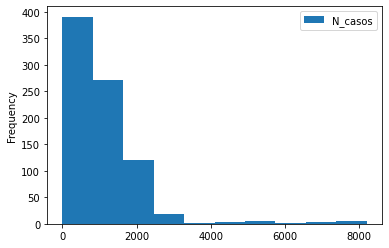

In [11]:
df_st.plot.hist()

#### Diferenciando a série

In [12]:
df_dif = df_st.diff(1)

<AxesSubplot:xlabel='Data_notificacao'>

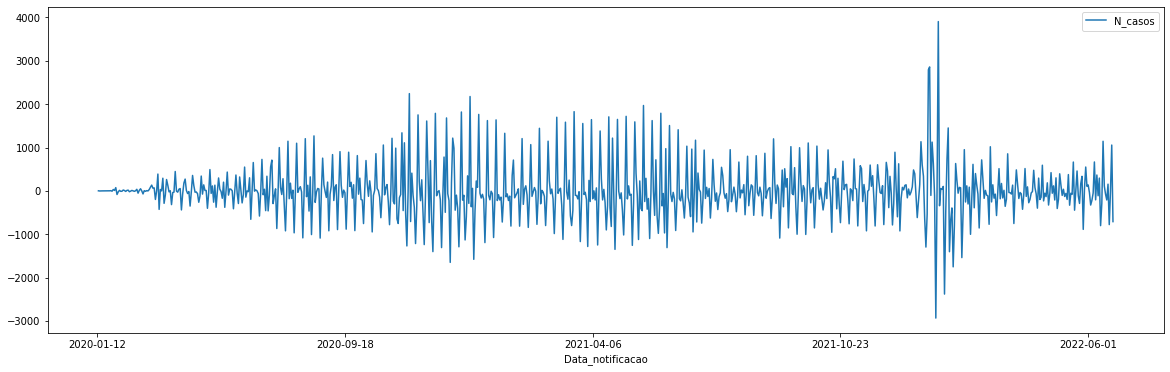

In [13]:
df_dif.plot(figsize=(20,6))

<AxesSubplot:ylabel='Frequency'>

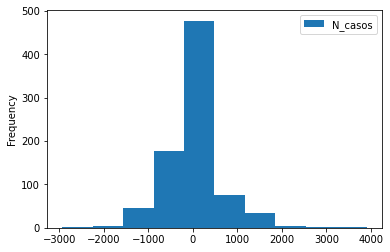

In [14]:
df_dif.plot.hist()

Série aproximadamente normal

#### Decomposição da série

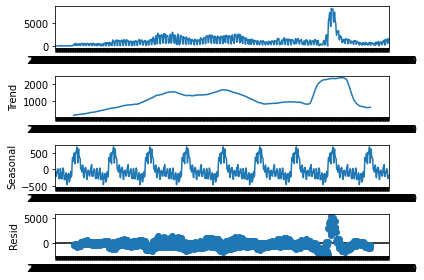

In [20]:
df_decomp = tsa.seasonal_decompose(df_st, period = 90)
df_decomp.plot();

####  Média movel

média movel para 30 dias

<AxesSubplot:xlabel='Data_notificacao'>

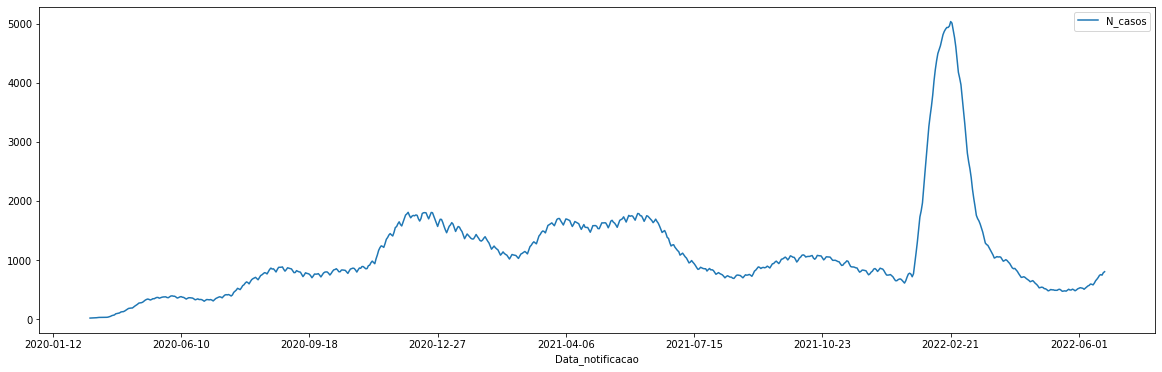

In [21]:
df_st.rolling(30).mean().plot(figsize=(20,6))

média movel para 90 dias

<AxesSubplot:xlabel='Data_notificacao'>

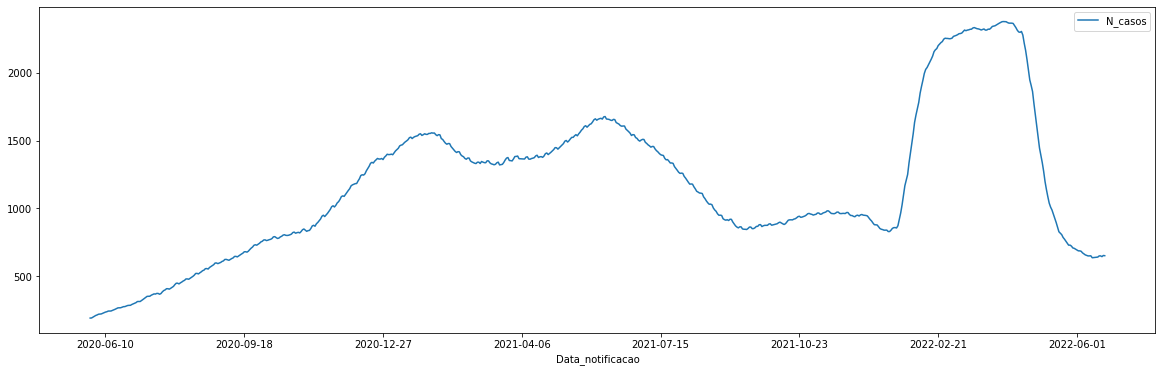

In [22]:
df_st.rolling(90).mean().plot(figsize=(20,6))

média movel 180 dias

<AxesSubplot:xlabel='Data_notificacao'>

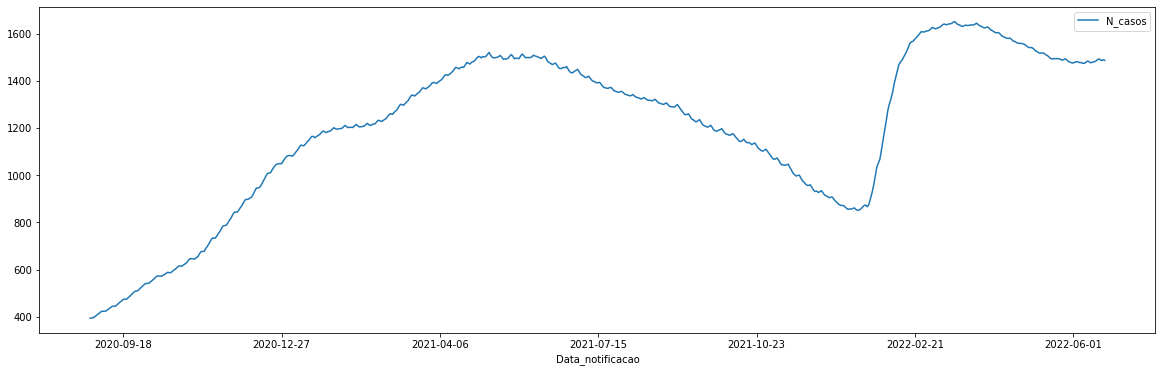

In [23]:
df_st.rolling(180).mean().plot(figsize=(20,6))